In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession, SQLContext
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("My App")
sc = SparkContext(conf = conf)
sqlContext = SQLContext(sc)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import warnings
warnings.simplefilter("ignore")

In [2]:
def load_xml(xml_path):
    return sqlContext.read.format('com.databricks.spark.xml').option("rowTag", "record").load(xml_path)
    
def load_xml_files_from(root):
    files = [os.path.join(root, f) for f in os.listdir(root) if '.xml.gz' in f]
    return [load_xml(file).toPandas() for file in files]

data = load_xml_files_from("../datasets/2016_testing_df/")
df = pd.concat(data).reset_index(drop=True)

In [3]:
df.columns

Index(['body', 'header', 'italic', 'metadata', 'p', 'sec', 'sub', 'sup',
       'xref', 'list', 'disp-formula', 'fig', 'graphic', 'table-wrap', 'tbody',
       'tr', 'bold', 'trans-abstract', 'abstract', 'back', 'counts',
       'custom-meta-group', 'funding-group', 'kwd-group', 'notes', 'self-uri',
       'td'],
      dtype='object')

In [11]:
df.body.isna().sum() / df.shape[0]

0.7655172413793103

Despite being called "body", the entries have very few words.

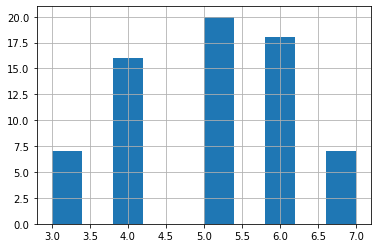

In [22]:
df_body = df[~df.body.isna()].body.copy()
_ = df_body.apply(len).hist()

In [26]:
df_body[3]

Row(italic=['in vivo'], p=Row(_VALUE='Heart failure and cardiovascular disease remain the leading cause of mortality and morbidity in the human population. Genetic mutations and altered expression of many genes encoding contractile proteins in the heart have been associated with cardiac malfunction and cardiovascular diseases', _id='P3'), sec=None, sub=None, sup=[Row(xref=[Row(_VALUE=1, _ref-type='bibr', _rid='R1'), Row(_VALUE=9, _ref-type='bibr', _rid='R9')]), Row(xref=[Row(_VALUE=10, _ref-type='bibr', _rid='R10'), Row(_VALUE=12, _ref-type='bibr', _rid='R12')]), Row(xref=[Row(_VALUE=13, _ref-type='bibr', _rid='R13'), Row(_VALUE=25, _ref-type='bibr', _rid='R25')]), Row(xref=[Row(_VALUE=26, _ref-type='bibr', _rid='R26'), Row(_VALUE=27, _ref-type='bibr', _rid='R27')]), Row(xref=[Row(_VALUE=28, _ref-type='bibr', _rid='R28'), Row(_VALUE=32, _ref-type='bibr', _rid='R32')])], xref=None)